In [1]:
# 特征工程策略
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
pd.options.display.max_colwidth = 200
%matplotlib inline

C:\Users\jianghaitao1\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\jianghaitao1\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\jianghaitao1\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\jianghaitao1\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
C:\Users\jianghaitao1\AppData\Local\Continuum\anacon

In [3]:
corpus = ['The sky is blue and beautiful.',
           'Love this blue and beautiful sky!',
           'The quick brown fox jumps over the lazy dog.',
           "A king's breakfast has sausages, ham, bacon, eggs, toast and beans",
           'I love green eggs, ham, sausages and bacon!',
           'The brown fox is quick and the blue dog is lazy!',
           'The sky is very blue and the sky is very beautiful today',
           'The dog is lazy but the brown fox is quick!'    
]
labels = ['weather', 'weather', 'animals', 'food', 'food', 'animals', 'weather', 'animals']

In [6]:
corpus = np.array(corpus)
corpus_df = pd.DataFrame({'Document':corpus,'Category':labels})

In [8]:
corpus_df = corpus_df[['Document', 'Category']]

In [9]:
corpus_df

,Document,Category
0,The sky is blue and beautiful.,weather
1,Love this blue and beautiful sky!,weather
2,The quick brown fox jumps over the lazy dog.,animals
3,"A king's breakfast has sausages, ham, bacon, eggs, toast and beans",food
4,"I love green eggs, ham, sausages and bacon!",food
5,The brown fox is quick and the blue dog is lazy!,animals
6,The sky is very blue and the sky is very beautiful today,weather
7,The dog is lazy but the brown fox is quick!,animals


### 文本预处理
* 删除标签：我们的文本经常包含不必要的内容，如HTML标签，分析文本的时候这不会增加多少价值。BeautifulSoup库可以帮我们做很多必须的工作。
* 删除重音字符：在任何文本语料库中，特别是在处理英语时，通常可能要处理重音字符/字母。因此，我们需要确保将这些字符转换并标准化为ASCII字符。一个简单的例子是将é转换为e。
* 扩展缩略语：在英语中，缩略语基本上是单词或音节的缩写形式。这些现有单词或短语的缩略形式是通过删除特定的字母和声音来创建的。例如，do not变为don 't以及I would 变为I 'd 。将每个缩略语转换为其扩展的原始形式通常有助于文本标准化。
* 删除特殊字符：非字母数字字符的特殊字符和符号通常会增加非结构化文本中的额外噪音。通常，可以使用简单正则表达式(regexes)来实现这一点。
* 词根提取和词形还原：词干通常是可能的单词的基本形式，可以通过在词干上附加词缀，如前缀和后缀来创建新单词。这就是所谓的拐点。获取单词基本形式的反向过程称为“词根提取”。一个简单的例子是单词WATCHES， WATCHING，和WATCHED。它们以词根WATCH作为基本形式。词形还原与词根提取非常相似，在词根提取中，我们去掉词缀以得到单词的基本形式。然而，在这种情况下，基本形式被称为根词，而不是词根。不同之处在于，词根总是一个词典上正确的单词(存在于字典中)，但根词的词干可能不是这样。
* 删除停止词：在从文本中构造有意义的特征时，意义不大或者没有意义的词被称为停止词或停止词。如果你在语料库中做一个简单的词或词的频率，这些词的频率通常是最高的。像a、an、the、and等词被认为是停止词。没有一个通用的停止词列表，但是我们使用了一个来自“nltk”的标准英语停止词列表。你还可以根据需要添加自己的域特定的停止词。<br>
除此之外，你还可以执行标准操作，如标记化，删除额外的空格，文本大小写转换和更高级的操作，如拼写纠正，语法错误纠正，删除重复字符等等。

In [10]:
wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')

In [11]:
def normalize_documnet(doc):
    # 转换为小写，移除特殊字符和空格
    doc = re.sub(r'[^a-zA-Z\s]','',doc,re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    tokens = wpt.tokenize(doc)
    filtered_tokens = [token for token in tokens if token not in stop_words]
    doc = ' '.join(filtered_tokens)
    return doc

In [26]:
# doc_list = list(corpus_df['Document'])
# for i in doc_list:
#     print(normalize_documnet(i))
norm_corpus = []
for i in corpus:
#     print(normalize_documnet(i))
    norm_corpus.append(normalize_documnet(i))

In [29]:
# 词袋模型
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(min_df = 0.,max_df = 1.)
cv_matrix = cv.fit_transform(norm_corpus)
cv_matrix = cv_matrix.toarray()
cv_matrix

array([[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0],
       [1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1],
       [0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0]],
      dtype=int64)

In [30]:
vocab = cv.get_feature_names()
pd.DataFrame(cv_matrix,columns=vocab)

,bacon,beans,beautiful,blue,breakfast,brown,dog,eggs,fox,green,ham,jumps,kings,lazy,love,quick,sausages,sky,toast,today
0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,0,0,0,0,0,1,1,0,1,0,0,1,0,1,0,1,0,0,0,0
3,1,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0
4,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0
5,0,0,0,1,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0
6,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1
7,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0


In [31]:
norm_corpus

['sky blue beautiful',
 'love blue beautiful sky',
 'quick brown fox jumps lazy dog',
 'kings breakfast sausages ham bacon eggs toast beans',
 'love green eggs ham sausages bacon',
 'brown fox quick blue dog lazy',
 'sky blue sky beautiful today',
 'dog lazy brown fox quick']

In [37]:
# N-Grams袋模型
bv = CountVectorizer(ngram_range=(2,2))
bv_matrix = bv.fit_transform(norm_corpus)
bv_matrix = bv_matrix.toarray()
vocab = bv.get_feature_names()
pd.DataFrame(bv_matrix,columns=vocab)

,bacon eggs,beautiful sky,beautiful today,blue beautiful,blue dog,blue sky,breakfast sausages,brown fox,dog lazy,eggs ham,...,lazy dog,love blue,love green,quick blue,quick brown,sausages bacon,sausages ham,sky beautiful,sky blue,toast beans
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
5,0,0,0,0,1,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
6,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
7,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
# TF-IDF模型
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer()
tv_matrix = tv.fit_transform(norm_corpus)
tv_matrix = tv_matrix.toarray().round(2)
vocab = tv.get_feature_names()
pd.DataFrame(tv_matrix,columns=vocab)

,bacon,beans,beautiful,blue,breakfast,brown,dog,eggs,fox,green,ham,jumps,kings,lazy,love,quick,sausages,sky,toast,today
0,0.00,0.00,0.60,0.53,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.60,0.00,0.0
1,0.00,0.00,0.49,0.43,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.57,0.00,0.00,0.49,0.00,0.0
2,0.00,0.00,0.00,0.00,0.00,0.38,0.38,0.00,0.38,0.00,0.00,0.53,0.00,0.38,0.00,0.38,0.00,0.00,0.00,0.0
3,0.32,0.38,0.00,0.00,0.38,0.00,0.00,0.32,0.00,0.00,0.32,0.00,0.38,0.00,0.00,0.00,0.32,0.00,0.38,0.0
4,0.39,0.00,0.00,0.00,0.00,0.00,0.00,0.39,0.00,0.47,0.39,0.00,0.00,0.00,0.39,0.00,0.39,0.00,0.00,0.0
5,0.00,0.00,0.00,0.37,0.00,0.42,0.42,0.00,0.42,0.00,0.00,0.00,0.00,0.42,0.00,0.42,0.00,0.00,0.00,0.0
6,0.00,0.00,0.36,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.72,0.00,0.5
7,0.00,0.00,0.00,0.00,0.00,0.45,0.45,0.00,0.45,0.00,0.00,0.00,0.00,0.45,0.00,0.45,0.00,0.00,0.00,0.0


In [40]:
# 文档相似度
# 有几个相似度和距离度量用于计算文档相似度。其中包括余弦距离/相似度、欧几里德距离、曼哈顿距离、BM25相似度、jaccard距离等
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(tv_matrix)
similarity_df = pd.DataFrame(similarity_matrix)
similarity_df
# 文档之间的夹角越小，它们之间的距离就越近

,0,1,2,3,4,5,6,7
0,1.000000,0.819642,0.000000,0.000000,0.000000,0.194185,0.817069,0.000000
1,0.819642,1.000000,0.000000,0.000000,0.225527,0.158412,0.670025,0.000000
2,0.000000,0.000000,1.000000,0.000000,0.000000,0.789420,0.000000,0.848476
3,0.000000,0.000000,0.000000,1.000000,0.507165,0.000000,0.000000,0.000000
4,0.000000,0.225527,0.000000,0.507165,1.000000,0.000000,0.000000,0.000000
5,0.194185,0.158412,0.789420,0.000000,0.000000,1.000000,0.117273,0.930397
6,0.817069,0.670025,0.000000,0.000000,0.000000,0.117273,1.000000,0.000000
7,0.000000,0.000000,0.848476,0.000000,0.000000,0.930397,0.000000,1.000000


In [41]:
# 使用相似特征对文档进行聚类
# 构建链接矩阵
from scipy.cluster.hierarchy import dendrogram,linkage
Z = linkage(similarity_matrix,'ward')
pd.DataFrame(Z,columns=['Document\Cluster 1', 'Document\Cluster 2','Distance', 'Cluster Size'], dtype='object')

,Document\Cluster 1,Document\Cluster 2,Distance,Cluster Size
0,2,7,0.256502,2
1,0,6,0.30859,2
2,5,8,0.390546,3
3,1,9,0.490942,3
4,3,4,0.732554,2
5,11,12,2.69519,5
6,10,13,3.44614,8


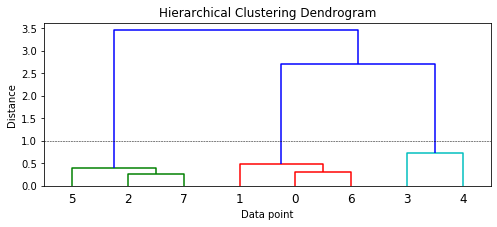

In [42]:
# 可视化树形图
plt.figure(figsize=(8,3))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data point')
plt.ylabel('Distance')
dendrogram(Z)
plt.axhline(y=1.0,c='k',ls='--',lw=0.5)

In [43]:
# 得到聚类标签
from scipy.cluster.hierarchy import fcluster
max_dist = 1.0
cluster_labels = fcluster(Z,max_dist,criterion='distance')
cluster_labels = pd.DataFrame(cluster_labels,columns=['ClusterLabel'])
pd.concat([corpus_df,cluster_labels],axis=1)

,Document,Category,ClusterLabel
0,The sky is blue and beautiful.,weather,2
1,Love this blue and beautiful sky!,weather,2
2,The quick brown fox jumps over the lazy dog.,animals,1
3,"A king's breakfast has sausages, ham, bacon, eggs, toast and beans",food,3
4,"I love green eggs, ham, sausages and bacon!",food,3
5,The brown fox is quick and the blue dog is lazy!,animals,1
6,The sky is very blue and the sky is very beautiful today,weather,2
7,The dog is lazy but the brown fox is quick!,animals,1
